<a href="https://colab.research.google.com/github/HikmahAlBaity/Wisdom/blob/main/Decision_Tree_July_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np

df = pd.read_csv('/drug200.csv')
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [40]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [41]:
# target value
df['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [42]:
X = df.iloc[:,:-1]
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [43]:
y = df['Drug']
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [44]:
# convert DF to array
type(X)

X=X.values



In [45]:
X[:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [46]:
# convert categorical to numeric (labelling the data)

from sklearn.preprocessing import LabelEncoder

label_sex =  LabelEncoder()
X [:,1] = label_sex.fit_transform(X[:, 1])

label_BP =  LabelEncoder()
X [:,2] = label_BP.fit_transform(X[:, 2])

label_ch =  LabelEncoder()
X [:,3] = label_ch.fit_transform(X[:, 3])

X[:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train.shape

(150, 5)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score

DT = DecisionTreeClassifier() #criterion="entropy", max_depth = 4

#training
DT.fit(X_train, y_train) # it shows the default parameters

#prediction
y_hat = DT.predict(X_test)

#evaluation
print("The DecisionTrees's Accuracy is: ", accuracy_score(y_test, y_hat))
print("The confusion matrix is: ", confusion_matrix(y_test, y_hat))
print("The jaccard score is: ", jaccard_score(y_test, y_hat, average ='micro'))

The DecisionTrees's Accuracy is:  1.0
The confusion matrix is:  [[ 4  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 21]]
The jaccard score is:  1.0


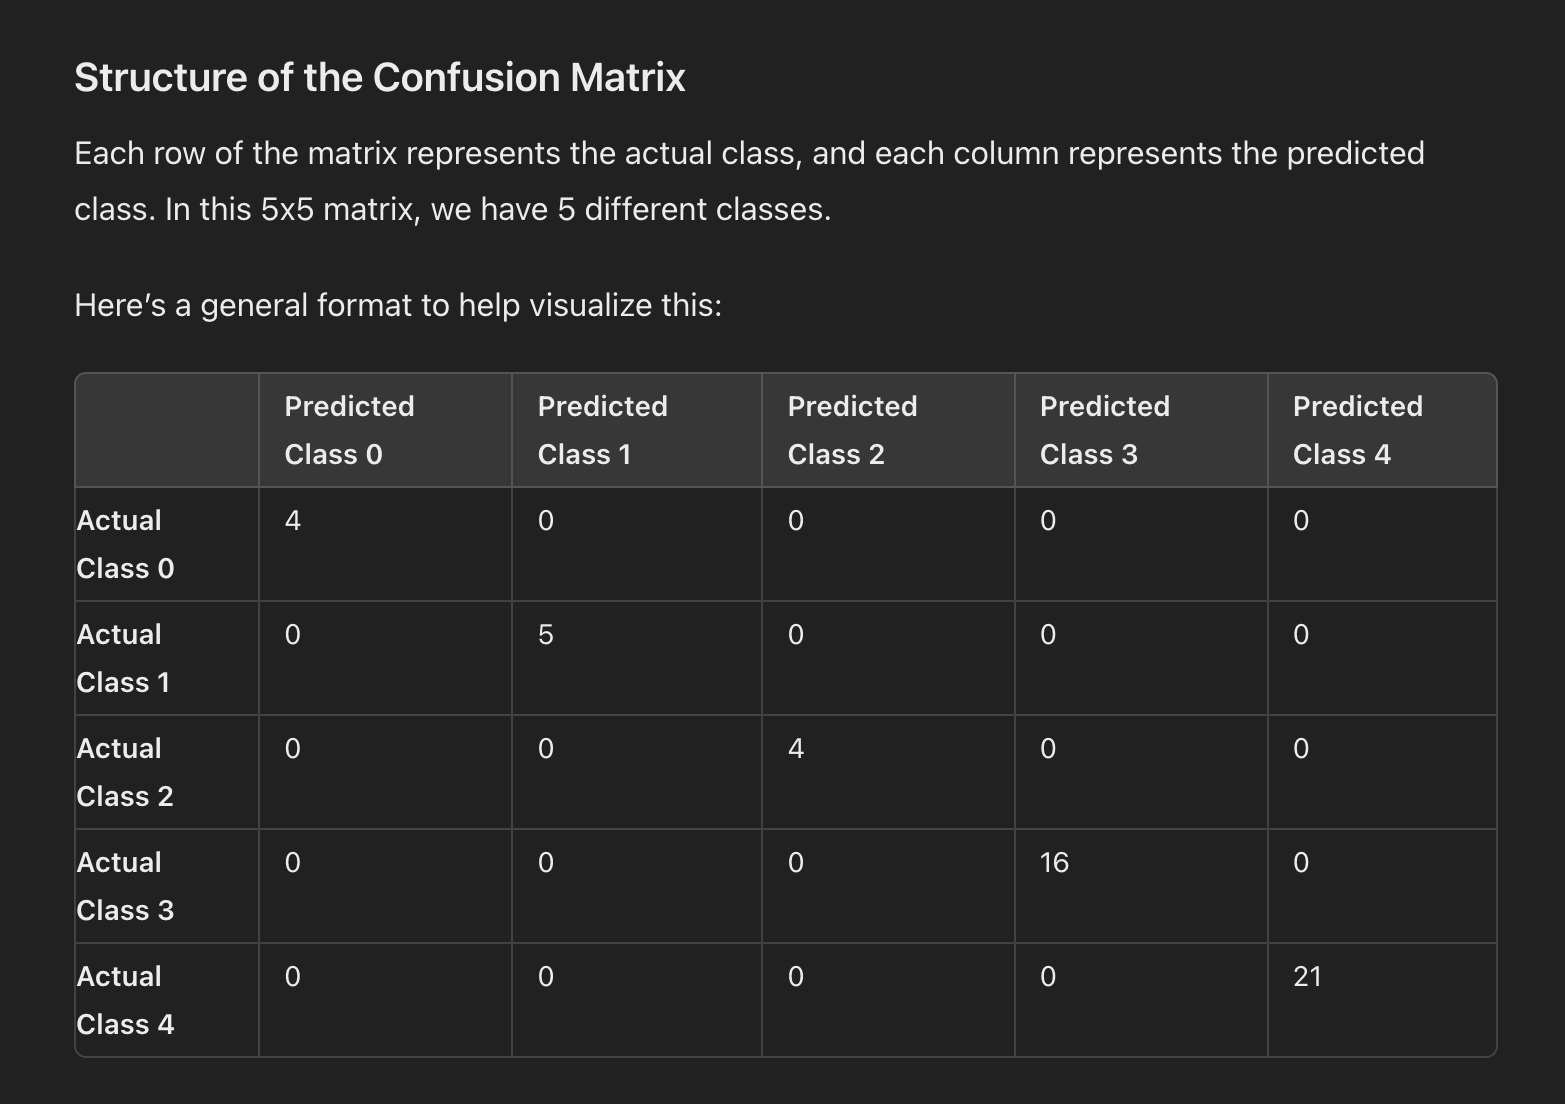


Interpretation
Diagonal Elements (True Positives):

These represent the number of correct predictions for each class.
Class 0: 4 correct predictions
Class 1: 5 correct predictions
Class 2: 4 correct predictions
Class 3: 16 correct predictions
Class 4: 21 correct predictions
Off-Diagonal Elements (False Positives and False Negatives):

These represent the misclassifications.
There are no off-diagonal elements in this matrix, meaning there were no misclassifications. Every prediction was correct.
Detailed Breakdown
Class 0:

Predicted as Class 0: 4 times (True Positives)
Misclassified as any other class: 0 times
Class 1:

Predicted as Class 1: 5 times (True Positives)
Misclassified as any other class: 0 times
Class 2:

Predicted as Class 2: 4 times (True Positives)
Misclassified as any other class: 0 times
Class 3:

Predicted as Class 3: 16 times (True Positives)
Misclassified as any other class: 0 times
Class 4:

Predicted as Class 4: 21 times (True Positives)
Misclassified as any other class: 0 times